In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox

from sklearn.cluster import OPTICS
from sklearn.metrics import homogeneity_score, completeness_score
from sklearn.manifold import TSNE

In [2]:
def plot_embedding(X, y, title=None):
    
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(12, 12))
    plt.grid()
    list_colors = ['dimgray', 'lightcoral', 'darkred', 'orangered', 'sandybrown', 'saddlebrown', 
                   'orange', 'gold', 'beige', 'olive', 'olivedrab', 'lawngreen', 'darkseagreen',
                   'forestgreen', 'dodgerblue', 'violet', 'crimson', 'navy', 'fuchsia', 'lavender']
    colors = list(map(lambda x: list_colors[x], y))
    
    plt.scatter(X[:, 0], X[:, 1], color=colors)
    
    if title is not None:
        plt.title(title)

In [3]:
def run_on_batch(X, y):
    
    cluster = OPTICS(min_samples=10, n_jobs=-1)
    predicted = cluster.fit_predict(X, y)

    print("Homogeneity Score: {}".format(homogeneity_score(y, predicted)))
    print("Completeness Score: {}".format(completeness_score(y, predicted)))

    tsne = TSNE(n_components=2, init='pca', random_state=0)
    X_tsne = tsne.fit_transform(X)

    plot_embedding(X_tsne, y, "t-SNE das classes")

In [4]:
true_labels = np.load('../data/true_label.npy')

Raw images flatten:
Homogeneity Score: 1.2018731994384412e-16
Completeness Score: 1.0


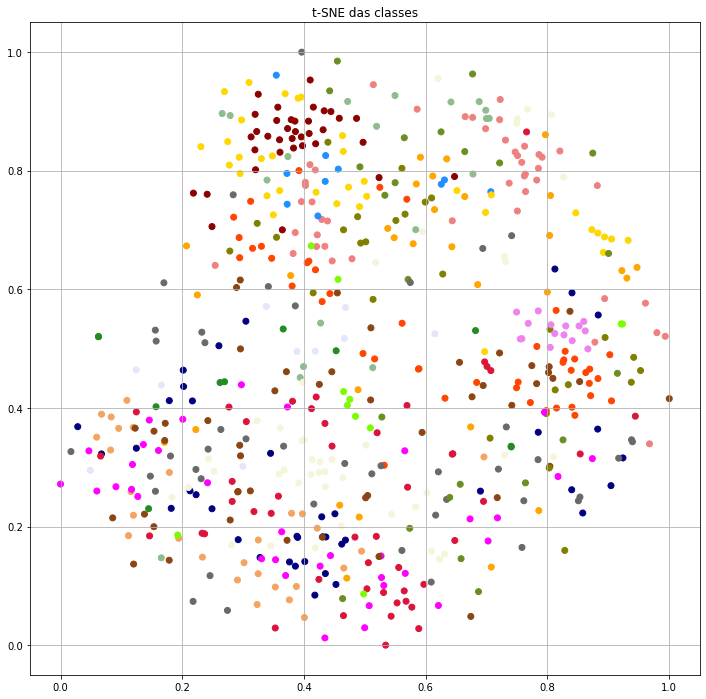

In [5]:
print("Raw images flatten:")
run_on_batch(np.load('../data/raw_images_flatten.npy'), true_labels)

Images 600:
Homogeneity Score: 1.2018731994384412e-16
Completeness Score: 1.0


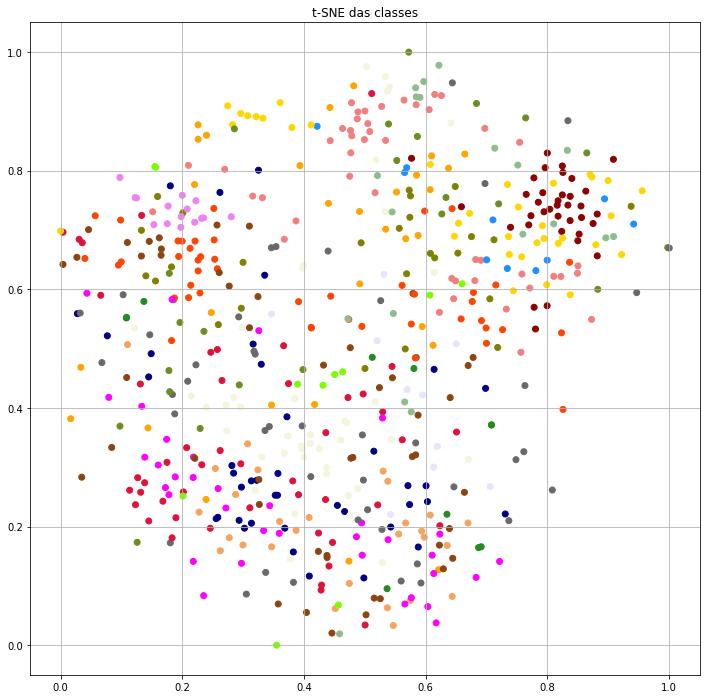

In [6]:
print("Images 600:")
run_on_batch(np.load('../data/images_600.npy'), true_labels)

Full data Embeddings:
Homogeneity Score: 1.2018731994384412e-16
Completeness Score: 1.0


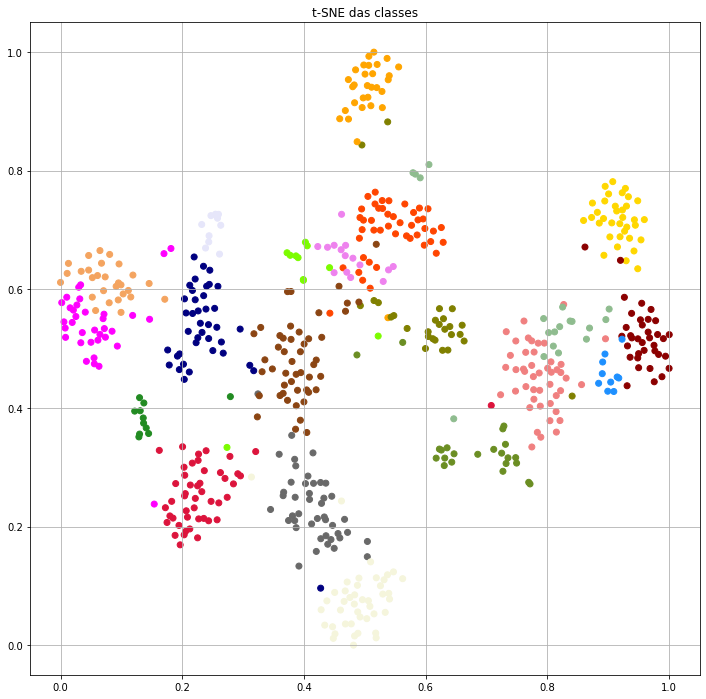

In [7]:
print("Full data Embeddings:")
run_on_batch(np.load('../data/full_data_embeddings.npy'), true_labels)

Partial data Embeddings:
Homogeneity Score: 1.2018731994384412e-16
Completeness Score: 1.0


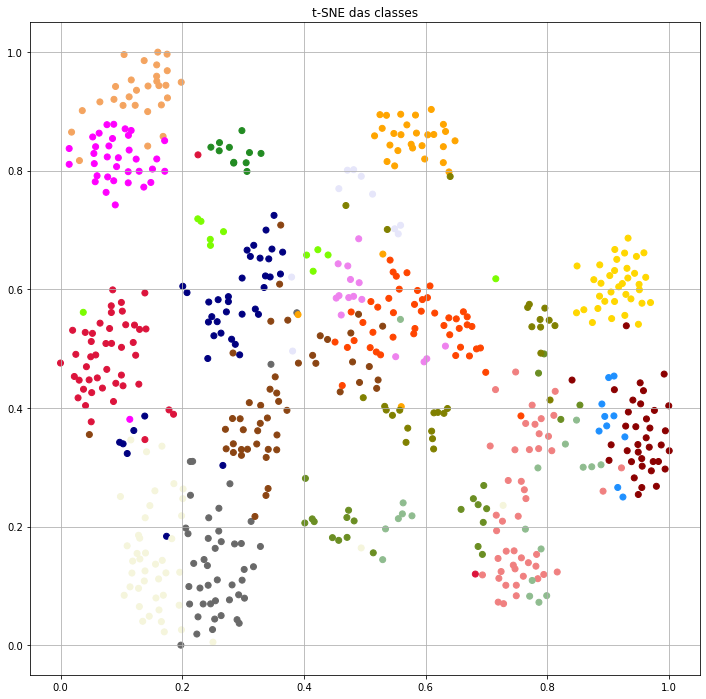

In [8]:
print("Partial data Embeddings:")
run_on_batch(np.load('../data/partial_data_embeddings.npy'), true_labels)